
## Case Study: A better Smoker Detector

**Objective:**

In this notebook, you will work on the insurance csv file. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Read & visualize data
Let's load the **insurance.csv** dataset to our code, using **pandas** module, more specifically, the **read_csv** function.

In [63]:
# read CSV file in Pandas
data = pd.read_csv('insurance (1).csv')

# display first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Question 1:** how many rows & columns in our dataset

In [64]:
# get the number of rows and columns
rows = data.shape[0]
columns =data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [66]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

**Question 2:** Select the instances where the data.smoker == "yes" and the ones where the data.smoker == "no". Save them in smokers and non_smokers dataframes respectively. Then count how many you have in each category.

In [67]:
# select smokers
smokers =data[data["smoker"]=="yes"]

# select non smokers
non_smokers =data[data["smoker"]=="no"]

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


**Question 3:** Is your data balanced?

No it's not balanced and you can see above we have 274 smokers and 1064 non-smokers which is not equal, and you can see from the code below

```
plt.hist(data["smoker"])
```



(array([ 274.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1064.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

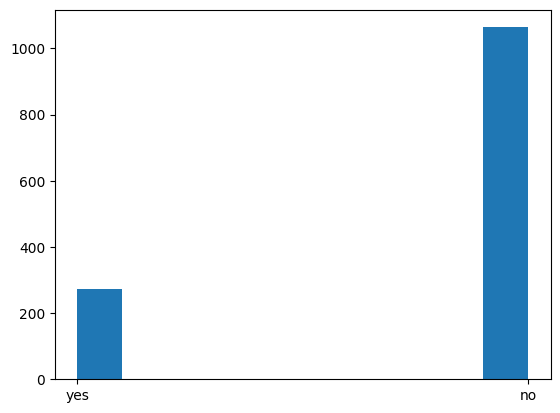

In [68]:
plt.hist(data["smoker"])

###Exploratory Data Analysis

Let's start by seeing how much each feature tells us about a person being  a smoker or not.

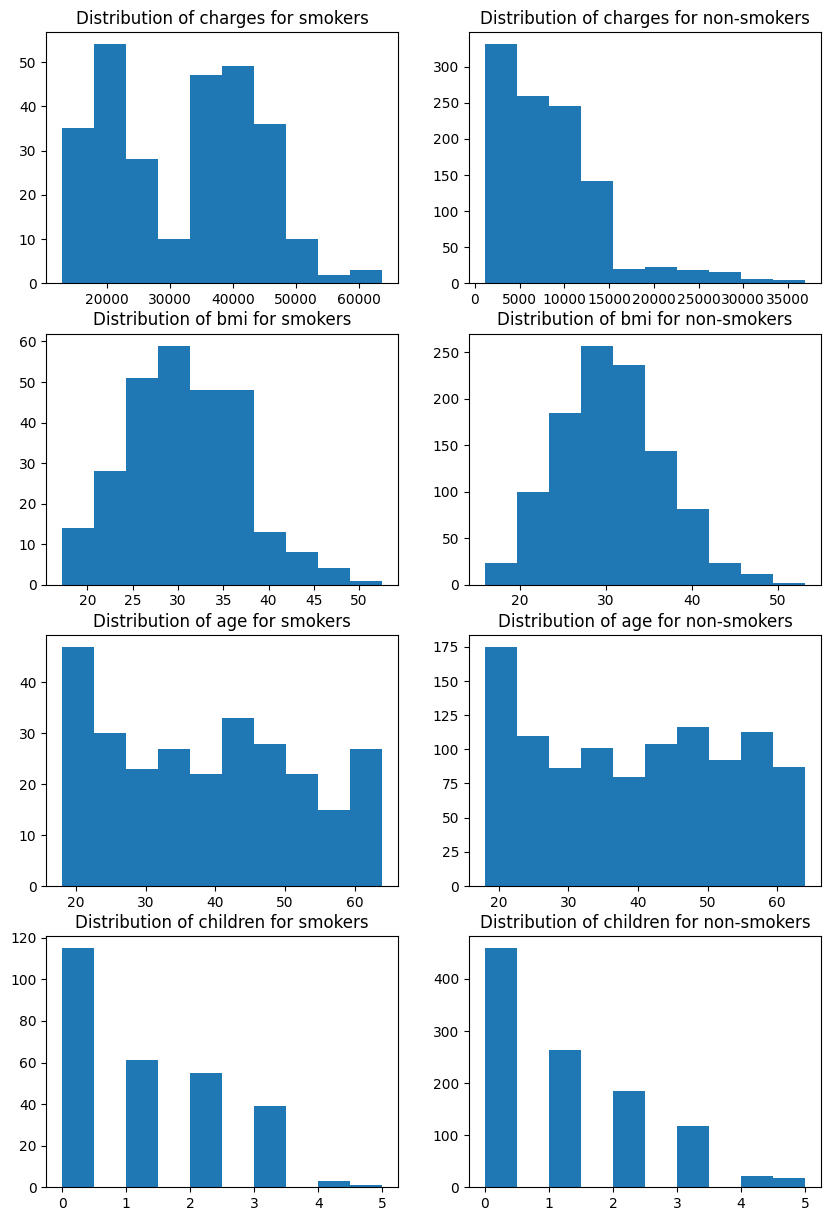

In [69]:
numerical_features = ['charges', 'bmi', 'age', 'children']

subplot_number = 421
fig = plt.figure(figsize=(10,15))

for f in numerical_features:

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(smokers[f])
  ax.set_title('Distribution of ' + f + ' for smokers')

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(non_smokers[f])
  ax.set_title('Distribution of '+ f + ' for non-smokers')

**Question 4:** From the above histograms, deduce which feature tells us the most about a person being smoker or not?

**charges feature have the highest affect to the smoker feature and you could see from the code below**


<ipython-input-70-980a17339d33>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_example.corr(), annot =True,cmap = "icefire")


<Axes: >

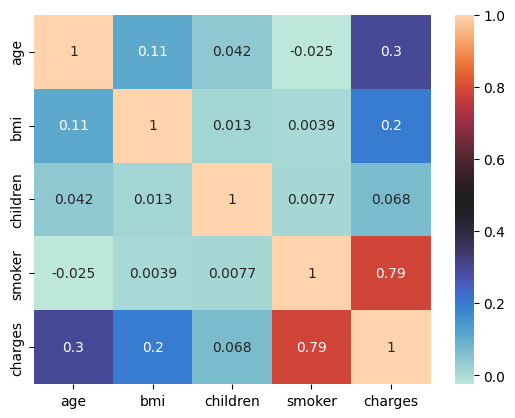

In [70]:
df_example = data.copy() #it's a temporory data
df_example["smoker"] = df_example["smoker"].replace({"yes":1,"no":0}) # i change it to zero and one (temporary)
# so i can use it in the heatmap
import seaborn as sns
sns.heatmap(df_example.corr(), annot =True,cmap = "icefire")

**Charges has a high correletion with smoker feature**

Now let's see if the gender influences being a smoker or not.

smoker   no  yes
sex             
female  547  115
male    517  159


<Axes: xlabel='sex'>

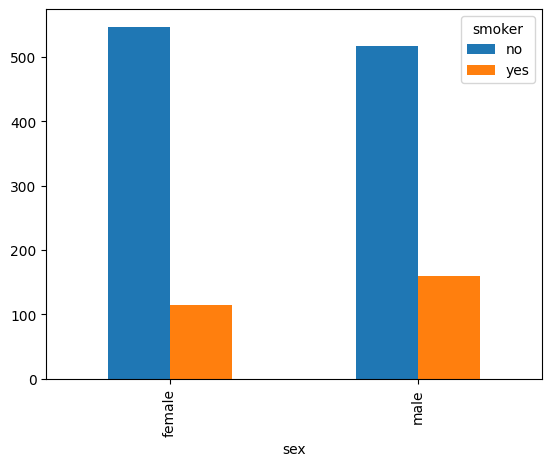

In [71]:
Gender = pd.crosstab(data['sex'],data['smoker'])
print(Gender)
Gender.plot(kind='bar')

**Question 5:** What can you conclude about the gender and the smoker status?

**we can see that males have a higher number of smokers than females by
 a (little bit)**

****

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by removing missing data.

**Question 6:** How many missing value are there in each column?

In [72]:
# print how many missing value in each column
data.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

Let's drop rows with missing values

In [73]:
# drop rows with missing values
data.dropna(inplace = True)
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



**Question 7:**


*   Replace male and female with 0 and 1
*   Replace smoker and non smoker represented by yes and no in the dataframe with 0 and 1



In [74]:
# define dictionary
change = {"male":0,"female":1}

# replace sex column with 0/1
data['sex'].replace(change , inplace = True)


# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


And now the smokers column

In [75]:
# define dictionary
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])
# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


And now the Region Column

In [76]:
# define dictionary
regions = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}
# replace region column with the corresponding values
data['region'] = data['region'].apply(lambda x: regions[x])
# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


#### Normalization

**Question 7:** Let's scale all the columns by dividing by the maximum

In [77]:
# get the max of each column
data.max()


age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64

In [78]:
# divide each column by its maximum value
data = data.divide(data.max()) #we do this to normalize the data
data.describe()
#to make sure that the max is equal to one

,age,sex,bmi,children,smoker,region,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.495381,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.368180,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.333333,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.333333,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.666667,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Model Training & Testing



#### Data splits

**Question 8:** Before training, we need to split data into training (80%) & testing (20%)

In [79]:
features = ['age',	'sex',	'bmi',	'children', 'region',	'charges']
X = data[features]

y = data['smoker']

# split dataset in a 80/20 split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 ,random_state =33)



print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 6) (1068,)
(267, 6) (267,)


#### Logistic Regression Modeling


In [80]:
# define our regression model
model = LogisticRegression()
# train our model
model.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

In [81]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_model_1 = accuracy_score(y_pred, y_test)
precision_model1 = precision_score(y_test, y_pred)
recall_model1 = recall_score(y_test, y_pred)
f1_score_model1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model_1,
      "\nPrecision:",precision_model1,
      "\nRecall:", recall_model1,
      "\nF1 Score:", f1_score_model1)

Accuracy: 0.9026217228464419 
Precision: 0.7692307692307693 
Recall: 0.6382978723404256 
F1 Score: 0.6976744186046512


We can see that the recall, and the f1 score can be improved.

**Question 9:** What can you do to improve results?

**we could do a lot of things like balance data , try anothor model , get more data ,  extra ...**

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

<Axes: >

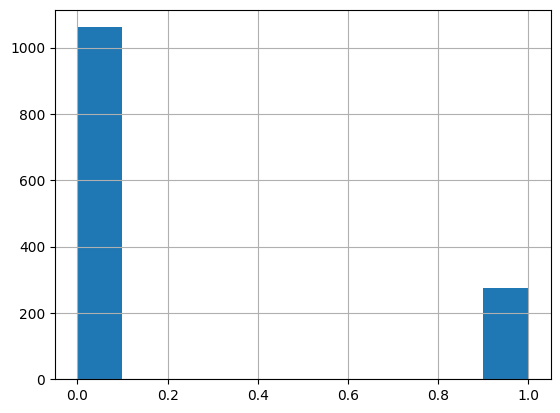

In [82]:
data['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [83]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy= 0.5)
x_new, y_new = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy= 1)
x_new, y_new = under.fit_resample(x_new, y_new)

(array([530.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 530.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

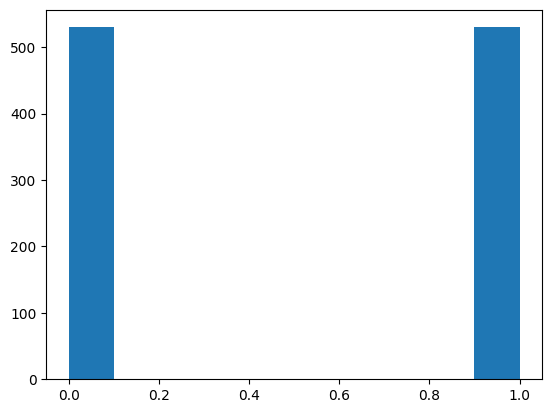

In [84]:
plt.hist(y_new) #now we can see that we have balance data

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [86]:
y_pred = model.predict(x_test)

accuracy_model2 = accuracy_score(y_test, y_pred)
precision_model2 = precision_score(y_test, y_pred)
recall_model2 = recall_score(y_test, y_pred)
f1_score_model2 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model2,
      "\nPrecision:",precision_model2,
      "\nRecall:", recall_model2,
      "\nF1 Score:", f1_score_model2)

Accuracy: 0.9575471698113207 
Precision: 0.9166666666666666 
Recall: 1.0 
F1 Score: 0.9565217391304348


We can see how much our scores got better when we balanced our dataset.

**At the end,Thank you mentor Azzam and SDAIA staff, for an outstanding ML bootcamp. I'm grateful for the invaluable knowledge gained. It has been a transformative experience.**